## Basic Model Training from Scratch

Note: This notebook is a heavily modified version of fastai course lesson found [here](https://github.com/fastai/fastai/blob/master/courses/dl1/lesson1.ipynb).

Welcome to lesson 1! For those of you who are using a Jupyter Notebook for the first time, you can learn about this useful tool in a tutorial we prepared specially for you; click `File`->`Open` now and click `00_notebook_tutorial.ipynb`. 

In this lesson we will build our first image classifier from scratch, and see if we can achieve world-class results. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [3]:
bs = 64
bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) is an extremely popular dataset for testing new state of the art models. If your model does not get above 95% accuracy on this dataset then some debugging you need to do.

In [5]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



Fastai has many different datasets that can be downloaded via the line below found [here](https://docs.fast.ai/datasets.html#URLs). For now, will be training in a small subset of MNIST which only has 2 classes.

In [30]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/fastai_user/.fastai/data/mnist_sample')

ImageDataBunch is part of fastai's data block API. This is a child of the DataBunch object found [here](https://docs.fast.ai/basic_data.html#DataBunch). DataBunches are the primary way models interact with the data. They have a bunch of ways of import the data:
    
    - ImageDataBunch.from_folder
    - ImageDataBunch.from_csv
    - ImageDataBunch.from_df
    - ImageDataBunch.from_name_func
    - ImageDataBunch.from_name_re
    - ImageDataBunch.from_lists

In [184]:
data = ImageDataBunch.from_folder(path, size=26,bs=bs).normalize(imagenet_stats); data

ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
7,7,7,7,7
Path: /home/fastai_user/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
7,7,7,7,7
Path: /home/fastai_user/.fastai/data/mnist_sample;

Test: None

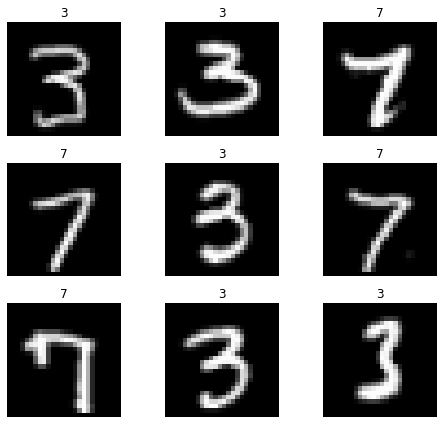

In [185]:
data.show_batch(rows=3, figsize=(7,6))

In [186]:
data.classes

['3', '7']

Let make a simple pytorch model from scratch and use fastai to test it.

In [243]:
class SimpleModule(Module):
    def __init__(self,image_h,image_w,image_c,
                 hidden_layer_size,n_classes):
        super(SimpleModule,self).__init__()
        self.l1=nn.Linear(image_h*image_w*image_c,
                          hidden_layer_size)
        self.l2=nn.Linear(hidden_layer_size,n_classes)
        
    def forward(self,x_input):
        x_input=Flatten()(x_input)
        x_input=nn.ReLU()(self.l1(x_input))
        x_input=nn.ReLU()(self.l2(x_input))
        return x_input

In [244]:
model=SimpleModule(image_h=26,image_w=26,image_c=3,
                   hidden_layer_size=16,
                   n_classes=data.c);model

SimpleModule(
  (l1): Linear(in_features=2028, out_features=16, bias=True)
  (l2): Linear(in_features=16, out_features=2, bias=True)
)

This is our learner. Notice that it will hold our data, our model, and all the metrics that we want to try.

In [247]:
learn = Learner(data, model, metrics=[error_rate,accuracy])

`learn.fit` starts training on your dataset.

In [248]:
learn.fit(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.026220,0.053153,0.013739,0.986261,00:03
1,0.030526,0.039801,0.012758,0.987242,00:03
2,0.027194,0.042789,0.014720,0.985280,00:03
3,0.025796,0.042150,0.011776,0.988224,00:03
4,0.033417,0.040205,0.011776,0.988224,00:03


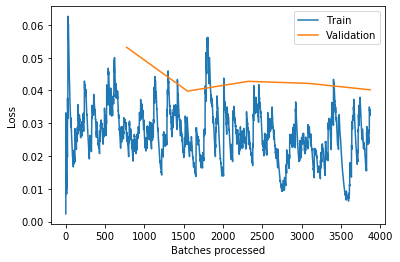

In [249]:
learn.recorder.plot_losses()

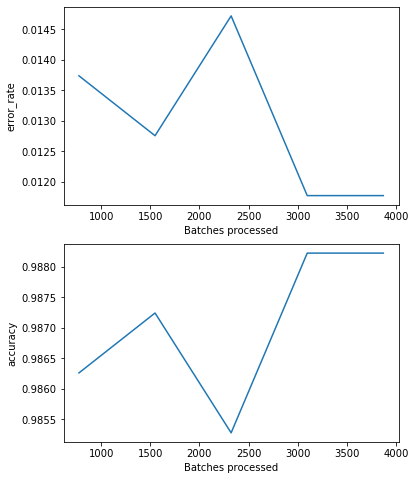

In [250]:
learn.recorder.plot_metrics()

In [256]:
interp=ClassificationInterpretation.from_learner(learn);interp

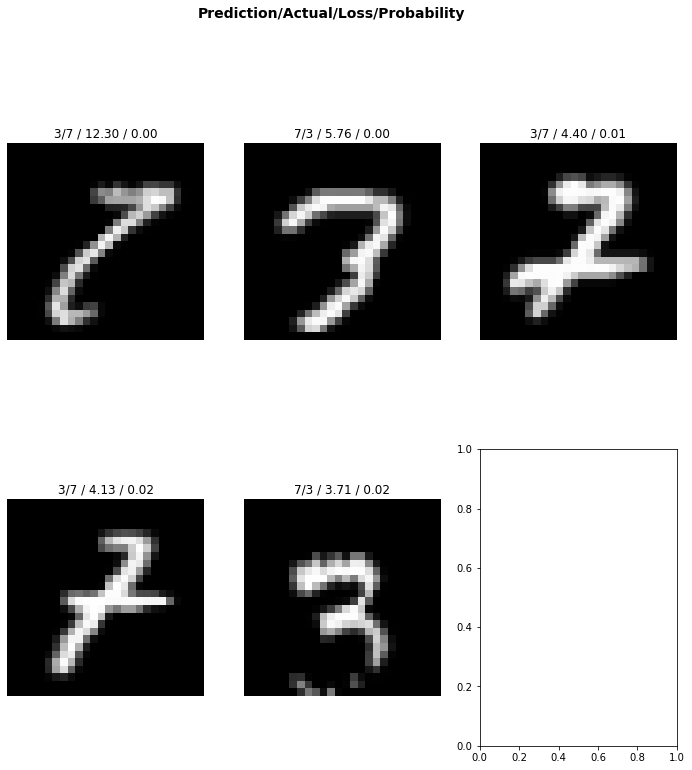

In [258]:
interp.plot_top_losses(5)

2027 misclassified samples over 2038 samples in the validation set.


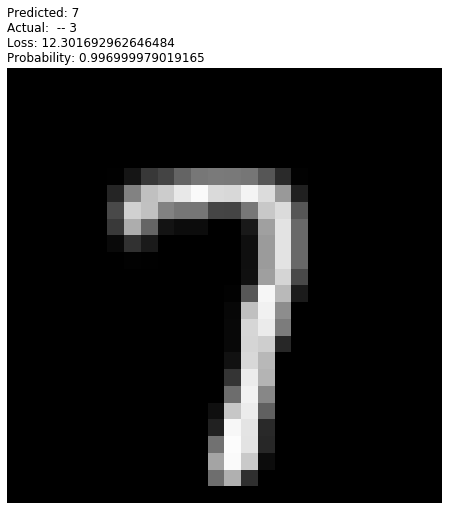

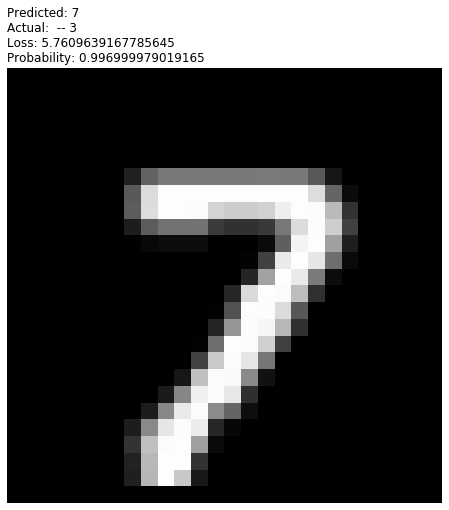

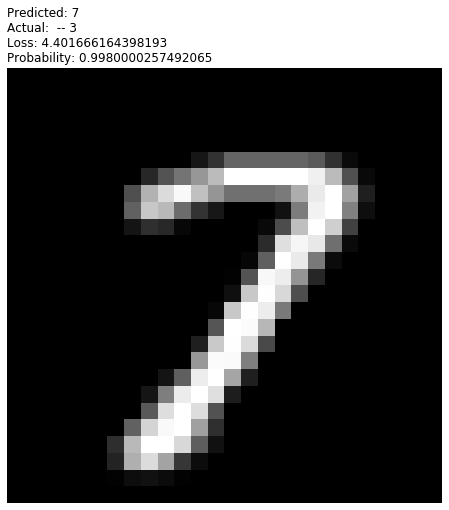

In [259]:
interp.plot_multi_top_losses()

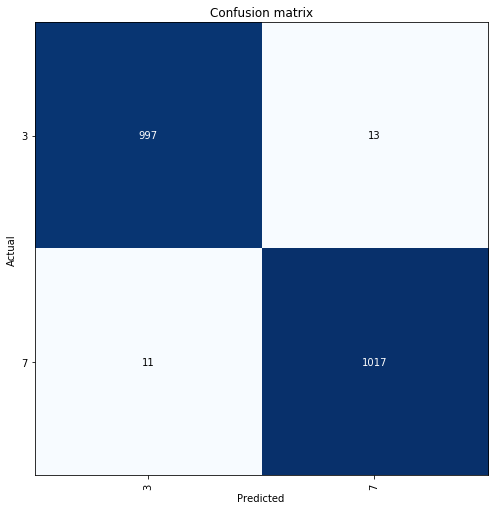

In [268]:
interp.plot_confusion_matrix(figsize=(7,7))